# Übung 2: Lineare Regression - Rainier Robles & Valentin Wolf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import & visualise the data

In [2]:
train = pd.read_table('zip.train', delim_whitespace=True,header=None)
test = pd.read_table('zip.test', delim_whitespace=True,header=None)

In [3]:
train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0


In [4]:
#train = train[(train[0]==7)|(train[0]==8)]
#test = test[(test[0]==7)|(test[0]==8)]
#split labels y from data X
y_train = train[0].as_matrix()
y_test = test[0].as_matrix()
X_train = train.drop(0, axis=1).as_matrix()
X_test = test.drop(0, axis=1).as_matrix()

(-0.5, 15.5, 15.5, -0.5)

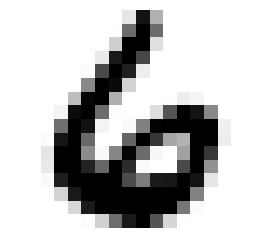

In [5]:
img = X_train[0,:].reshape(16,16)
im = plt.imshow(img, cmap='Greys')
plt.axis('off')

In [6]:
def is_invertible(X):
    return np.linalg.cond(X) < 1 / np.spacing(1)

### Define the Classifier

In [7]:
class Classifier(object):
    def  __init__(self):
        pass
    
    def error_rate(self,truth, pred):
        """gets two vectors, returns (correct classified / total classified)"""
        amount = truth.shape[0]
        wrong = np.count_nonzero(truth - pred)
        return wrong/amount
    
def confused_matrix(x,y,percentage=False):
    assert(x.shape == y.shape)
    num_entries = x.shape[0]
    matrix = np.zeros((10,10))
    for i in range(num_entries):
        matrix[int(x[i]),int(y[i])] += 1
    if percentage==True: 
        matrix /= np.sum(matrix,axis=1)
    return matrix


def pinv(self,X,noise_rate):
    '''Calculates a pseudo inverse of matrix X, X has to be quadratic'''

    def is_invertible(X):
        return np.linalg.cond(X) < 1 / np.spacing(1)
    
    I = np.identity(X.shape[0])
    total_noise = 0
    X_ = X
    while True:
        if is_invertible(X_):
            pinv = np.linalg.inv(X_)
            #print("Total noise: ", total_noise)
            return pinv
        else:
            total_noise += noise_rate
            X_ = ((1-total_noise)*X)+(total_noise*I)

def pdet(self, X):
    eig_values,_= np.linalg.eig(X)
    pdet = np.prod(eig_values[eig_values > 1e-4])
    return pdet 


In [8]:
class LinearRegression(Classifier):
    def train(self, X, y, noise_rate=0.01):
        N = X.shape[0]
        #add a column of 1s to multiply it by constant/bias later on
        X = np.concatenate((np.ones((N,1)),X),axis=1)
        self.beta = self.pinv(np.dot(X.T, X),noise_rate).dot(X.T).dot(y)
        
    def pinv(self,X,noise_rate):
        '''Calculates a pseudo inverse of matrix X, X has to be quadratic'''
        I = np.identity(X.shape[0])
        total_noise = 0
        X_ = X
        while True:
            if is_invertible(X_):
                pinv = np.linalg.inv(X_)
                #print("Total noise: ", total_noise)
                return pinv
            else: # LinAlgError:
                total_noise += noise_rate
                X_ = ((1-total_noise)*X)+(total_noise*I)
        
                
    def predict(self,X):
        N = X.shape[0]
        #add a column of 1s to multiply it by constant/bias later on
        X = np.concatenate((np.ones((N,1)),X),axis=1)
        return X.dot(self.beta)
    
    def classify(self,X):
        '''returns matrix y with values 1 if predicted value of row is >=0 else 0 '''
        return (self.predict(X)>=0).astype(int)

    

### Train the 10 Classifiers for all vs one

In [9]:
classifiers = []

for i in range(10):
    classifier = LinearRegression()
    classifier.train(X_train,(y_train==i).astype('int8')*2-1,noise_rate = 0.1 )
    classifiers.append(classifier)

### Let's predict

In [10]:
predictions = []
for i in range(10):
    y_pred = classifiers[i].predict(X_test)
    predictions.append(y_pred)
    print("Classifier for ", i, " error rate: ", classifier.error_rate(((y_test==i).astype(int)),classifiers[i].classify(X_test)))

Classifier for  0  error rate:  0.029397110114598904
Classifier for  1  error rate:  0.0114598903836572
Classifier for  2  error rate:  0.03587443946188341
Classifier for  3  error rate:  0.03687095166915795
Classifier for  4  error rate:  0.04035874439461883
Classifier for  5  error rate:  0.03537618335824614
Classifier for  6  error rate:  0.018435475834578975
Classifier for  7  error rate:  0.02092675635276532
Classifier for  8  error rate:  0.04534130543099153
Classifier for  9  error rate:  0.03537618335824614


### The argument/index of the max value in each row is the predicted number

In [12]:
pred_classifications = np.argmax(np.asarray(predictions),axis=0)

error_rate = classifier.error_rate(y_test, pred_classifications)
print("Total error rate: ", round(error_rate,5))

Total error rate:  0.13054


In [15]:
predictions

[array([-0.93226349, -0.66601074, -1.35040613, ..., -0.41015828,
         1.22493766, -1.19110311]),
 array([-0.90140209, -1.096394  , -1.11191559, ..., -0.96391751,
        -1.3020005 ,  0.75821168]),
 array([-0.99371955, -0.45507103, -0.52181336, ..., -1.06650427,
        -0.75391226, -0.9165346 ]),
 array([-0.87593359, -1.27567546,  0.64846738, ..., -1.15052566,
        -1.50459191, -0.97522972]),
 array([-0.44869591, -0.18514493, -1.12055074, ...,  0.60216072,
        -0.85932729, -0.91673383]),
 array([-1.39099132, -0.75743175, -0.97588842, ..., -1.75067731,
        -1.18747672, -1.03038481]),
 array([-1.15923651, -0.04386416, -1.20058738, ..., -1.20198668,
        -0.90405136, -0.93562717]),
 array([-0.73092383, -0.93994786, -0.81567696, ..., -1.12753973,
        -0.80615946, -1.03055589]),
 array([-0.6973223 , -1.54938587, -0.63439725, ..., -0.2010116 ,
        -0.7815379 , -1.00800348]),
 array([ 0.13048859, -1.03107421, -0.91723155, ..., -0.72983968,
        -1.12588026, -0.75

In [16]:
pred_classifications

array([9, 6, 3, ..., 4, 0, 1])

### Plot results

In [339]:
x = confused_matrix(y_test,pred_classifications)
x.astype('uint16')

array([[347,   2,   0,   1,   3,   1,   4,   0,   0,   1],
       [  0, 254,   0,   2,   3,   0,   3,   0,   1,   1],
       [  8,   3, 157,   7,   9,   2,   1,   1,  10,   0],
       [  5,   0,   4, 138,   2,   8,   0,   2,   3,   4],
       [  3,   7,   4,   0, 169,   1,   3,   2,   1,  10],
       [  9,   1,   0,  20,   2, 122,   0,   1,   1,   4],
       [  3,   2,   4,   0,   5,   4, 151,   0,   1,   0],
       [  3,   1,   1,   1,   7,   0,   0, 130,   0,   4],
       [  8,   3,   2,  14,   4,  10,   1,   1, 119,   4],
       [  0,   3,   0,   0,   7,   0,   0,   7,   2, 158]], dtype=uint16)

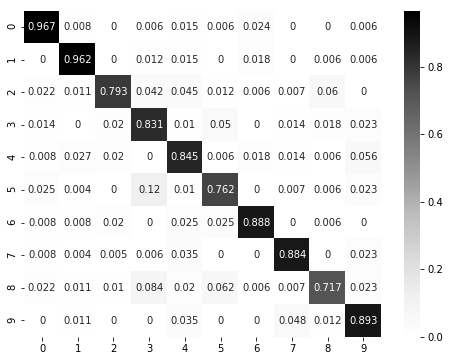

In [273]:
x = confused_matrix(y_test,pred_classifications,percentage=True)
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(ax=ax,data=np.round(x,3), annot=True, fmt="g", cmap='Greys')